<span style="font-size: 14pt">MIPT, Applied ML, Autumn 2018</span>

<span style="font-size: 16pt"> HW #2: ARIMAX, Compositions, NN

<span style="color:red; font-size: 14pt;"> Дедлайн 06.10.2018 23:59 </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>


<span style="color:blue; font-size: 12pt">Radoslav Neychev </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">neychev@phystech.edu</span>

**Дополнительный материал для выполнения дз**:
- Лукашин Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11
- 

**Оформление дз**: 
- Выполненное задание требуется отправлять через <a href='https://goo.gl/forms/XPSIbwp7wPxB4SsI3'>форму </a>
    - <span style="color:red; font-size: 20pt">ВНИМАНИЕ: для отправки задания потребуется почта в домене gmail.com или phystech.edu</span> 
- Выполненное дз прикрепляйте в формате файла ``<фамилия>_<группа>_task<номер>.ipynb``, например: ``ivanov_594_task1.ipynb`` 

**Вопросы**:
- Вопросы присылайте на почту ml.course.mipt@gmail.com
- Укажите тему письма в следующем формате ``ML2018_fall_Question_<Тема вопроса>``

--------
- **PS1**: Будьте внимательны при заполнении формы, когда отправляете ДЗ 


<h1 align="center">Теоретическая часть (20%)</h1> 

При ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам.

---

**Вопрос 1 (4%)**  Напишите уравнение временного ряда (в виде $y_t=f\left(y_{t-1}, \dots, y_1,~\varepsilon_{t},\dots, \varepsilon_{1}\right)$) которая соответствует модели:
   * 1) ARIMA $(p=1,d=k,q=0)$,
     - <Ответ>
   * 2) ARIMA $(p=1,d=k+1,d=0)(P=0, D=1, Q=1)_s$,
     - <Ответ>
--- 
**Вопрос 2 (4%)**   
   * 1) Опишите ситуацию (аргументированно), в котором композиция Adaptive Composition будет прогнозировать хуже, чем лучший из базовых алгоритмов.
    - <Ответ>
   * 2) Опишите ситуацию (аргументированно), в котором композиция Adaptive Selection будет прогнозировать хуже, чем лучший из базовых алгоритмов.
    - <Ответ>

---

**Вопрос 3 (6%)** Покажите, что ARIMA$(p=1,d=2, q=2)$ эквивалентна модели ЭС с линейным затухающим трендом (damped-trend linear exponential smoothing ) при условиях:
		$$(1-\phi B)(1-B)Y_t = (1-\theta_1 B-\theta_2 B^2)\epsilon_t$$
		$$\theta_1 = 1+\phi-\alpha-\alpha\beta\phi, \text{ } \theta_2 = (\alpha-1)\phi$$
        $\phi$~--- coefficient of damped trend.

---        

**Вопрос 4 (6%)**: Покажите, что для модели  
    $$AR(p)\colon \;\;\; y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + \varepsilon_t,$$  
    где $y_t$ стационарный процесс с нулевым средним,$~~$
    $\phi_1,\dots,\phi_p$ - константы ($\phi_p \neq 0$), $~~$
    $\varepsilon_t$ несмещённый гауссовский шум с дисперсией $\sigma_\varepsilon^2 $
выполнено:

  * 1) частный коэффициент автокорреляции
   $$\phi_{\tau\tau} = \mathsf{E}[y_t-\hat y_t, y_{t+\tau} - \hat y_{t+\tau}]= \begin{cases}0 &, \tau>p; \\ f(\tau,p)>0 &, 0\leq\tau\leq p. \end{cases}$$
	
  где $\hat y_t$ - прогноз $y_t$ согласно следующей регрессионной модели $$y_t = \sum_{j=1}^{\tau-1}\beta_j y_{t+j}$$
    $\hat y_{t+\tau}$ - прогноз $y_{t\tau}$ согласно следующей регрессионной модели $$y_{t+\tau} = \sum_{j=1}^{\tau-1}\gamma_j y_{t+j}.$$

<Ответ>

[Решения](https://drive.google.com/drive/folders/10pfILkIho0U0nWZDOBK3YEi-YFuDxsyy?usp=sharing)  <-------------------------------<--------------------<--------<---<-<-

<h1 align="center">Практическая часть I (30%)</h1>
Требуется проанализировать временной ряд и спрогнозировать его моделю ARIMA. 
Каждый студент прогнозирует свой собсвтенный временной ряд, соответствующий ВР нужно смотреть на листе HW2_TS <a href="https://docs.google.com/spreadsheets/d/188zdwJ1onHseMCvtRK3_uh6WW8prHssoiZ9l-_Mfk0M/edit#gid=1703509799">здесь</a>. 

(Каждый из нижеследующих пунктов задания оценивается в 3% от общего веса задания).

In [0]:
# start with this code
import pandas as pd
import numpy as np
# rom utils import TheilWageExponentialSmoothing, build_forecast, plot_tsforecast
# from utils import qualityRMSE, qualityMedianAE, qualityMACAPE, qualitySSE, qualityMSE, qualityMAPE 
from calendar import monthrange
%matplotlib inline


* 0) read data for TS under consideration and use the first 80% of all length of the TS as train TS.  
* 1) plot the graph of the train TS, preprocess data (delete tail, make calendar transformation if needed)

In [3]:
def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())

upload_files()

Saving monthly-canadian-total-unemploym.csv to monthly-canadian-total-unemploym.csv


['monthly-canadian-total-unemploym.csv']

Посмотрим на весь графон

In [48]:
! pip install adjustText
from adjustText import adjust_text

  Running setup.py bdist_wheel for adjustText ... - done
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built adjustText


(242, 1)


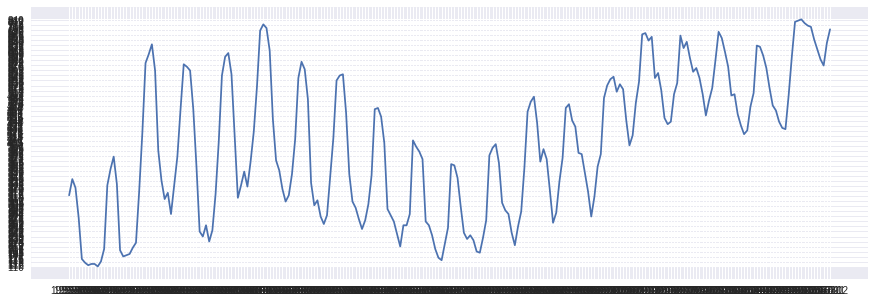

In [79]:
import matplotlib.pyplot as plt
# Put your code here
unemp = pd.read_csv('monthly-canadian-total-unemploym.csv', sep=',', decimal='.',
                    index_col=0, parse_dates=True, dayfirst=True, names = ['date', 'value'])

print(unemp.shape)
# # Put your code below
# unemp.plot(figsize=(15,5))
unemp = unemp['1956-01': '1975-12']
plt.figure(figsize=(15,5))
# adjust_text(texts, only_move='y', arrowprops=dict(arrowstyle="->", color='r', lw=0.5)) #TODO later!!!
plt.plot(unemp)
plt.show()

In [80]:
unemp.head()  # that's why I cut data on prev stage/
# (the last lane was 
#'''Monthly Canadian total unemployment figures (thousands) 1956-1975 	NaN)'''

,value
date,
1956-01,315
1956-02,340
1956-03,321
1956-04,273
1956-05,175


Нормирую на кол-во дней в месяце, и умножаю на 30, просто для того, чтобы порядок чисел был похож на изначальный

In [0]:
# unemp.iloc[1].name
unemp['value'] = unemp['value'].astype(int)

In [0]:
for index, value in enumerate(unemp['value']):
  unemp.iloc[index]['value'] = float(value) / monthrange(int((unemp.iloc[index].name)[:4]), int((unemp.iloc[index].name)[5:7]))[1] * 30

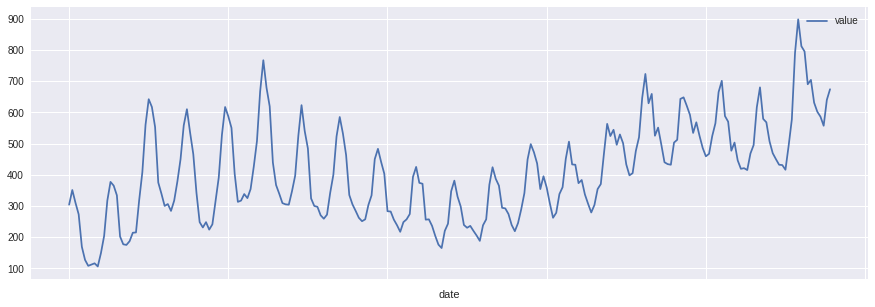

In [83]:
unemp.plot(figsize=(15,5))

In [0]:
# - хвост
unemp = unemp['1958-01':]

In [0]:
unemp_train = unemp[:int(unemp.shape[0]*0.8)]
unemp_test = unemp[int(unemp.shape[0]*0.8):]

In [86]:
test_labels = unemp_test.iloc[:].index

train_labels = unemp_train.iloc[:].index
train_labels[3]

'1958-04'

In [87]:
unemp_test.head()

,value
date,
1972-05,534
1972-06,568
1972-07,525
1972-08,486
1972-09,459


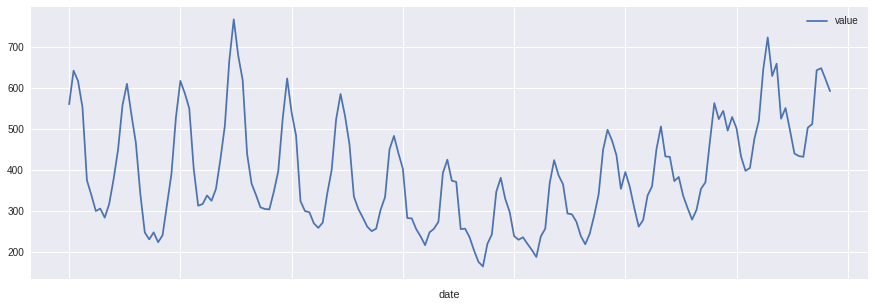

In [88]:
unemp_train.plot(figsize=(15,5))

* 2) stabilize dispersion of the train TS through box-cox transformation if needed.

In [89]:
# Put your code here
from copy import deepcopy
from scipy import stats
unemp_train_boxcox = deepcopy(unemp_train)
unemp_test_boxcox = deepcopy(unemp_test)
# find optimal lambda 
# unemp_train = unemp_train.astype(float)
opt_lambda =stats.boxcox(unemp_train)[1][0]
print('optimal lambda:', opt_lambda)

optimal lambda: -0.01458641339538845


Небольшая заметка. Вначале, без обрезания хвоста, $\lambda$ была равна 0,42. Теперь она $\rightarrow$ к нулю.

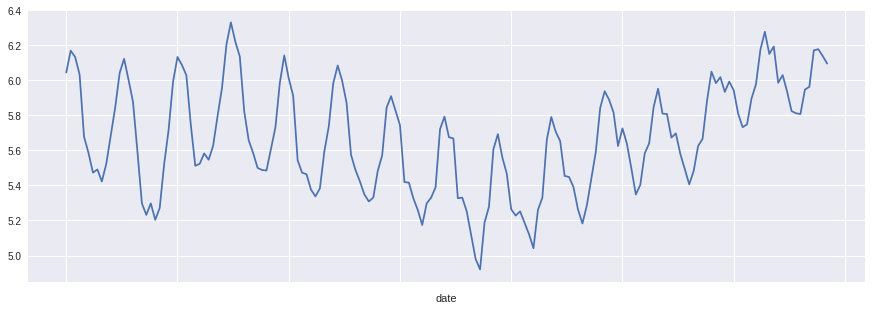

In [90]:
unemp_train_boxcox['unemp_boxcox'] = stats.boxcox(unemp_train)[0]
unemp_test_boxcox['unemp_boxcox'] = np.log(unemp_test['value'])
unemp_train_boxcox['unemp_boxcox'].plot(figsize=(15,5))

In [91]:
unemp_train_boxcox.head()

,value,unemp_boxcox
date,,
1958-01,560,6.044678
1958-02,642,6.169157
1958-03,617,6.133001
1958-04,553,6.033207
1958-05,375,5.677953


* 3) if the transformed train TS is non-stationary make it stationary (remember the power of differencing $d$).

In [0]:
import matplotlib.pyplot as plt

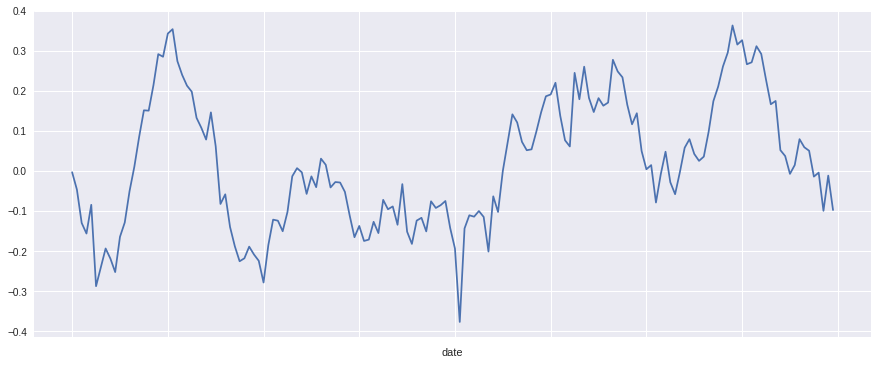

In [93]:
# Put your code here
p = 12  # I take shift = 12, because of period of max&min
sdiff_unemp_train_boxcox = (unemp_train_boxcox['unemp_boxcox'] - unemp_train_boxcox['unemp_boxcox'].shift(p))[p:]
sdiff_unemp_test_boxcox = (unemp_test_boxcox['unemp_boxcox'] - unemp_test_boxcox['unemp_boxcox'].shift(p))[p:]

plt.figure(figsize=(15,6))
sdiff_unemp_train_boxcox.plot()

In [94]:
from statsmodels.tsa import stattools
# Test, if this is stationary, with help if kpss kriteria

kpss_stat= stattools.kpss(np.array(sdiff_unemp_train_boxcox))
print('The KPSS test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ntable distribution: %s' % 
      (kpss_stat[0], kpss_stat[1], kpss_stat[2], kpss_stat[3]))

The KPSS test statistic 0.339131, 
pvalue: 0.10 
maximal Lag: 14 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


Была фраза, что если p_value > (маленькое значение) то отвергается нулевая гипотеза. Стационарности нет
(?) так норм или нет? \ 
Итого:
Если сказал что нестац => нестац
Если сказал что стационарный => он может врать. Смотрим глазами, и другими критериями

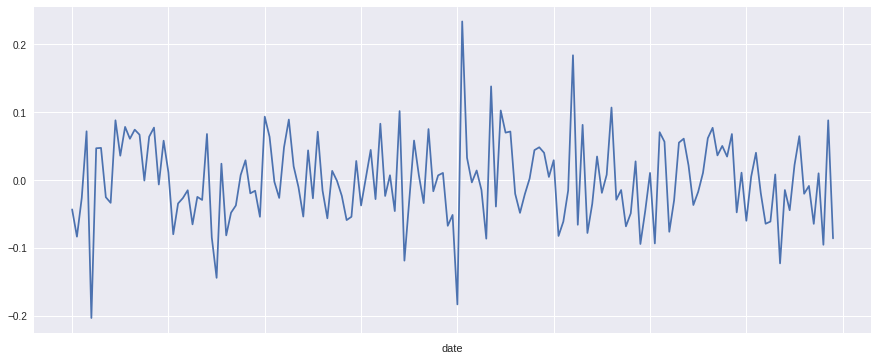

In [95]:
sdiff_unemp_train_boxcox_onceagain = (sdiff_unemp_train_boxcox  - sdiff_unemp_train_boxcox .shift(1))[1:]
sdiff_unemp_train_boxcox_onceagain.plot(figsize=(15,6))

In [96]:
 # Test, if this is stationary, with help if kpss kriteria

kpss_stat= stattools.kpss(np.array(sdiff_unemp_train_boxcox_onceagain))
print('The KPSS test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ntable distribution: %s' % 
      (kpss_stat[0], kpss_stat[1], kpss_stat[2], kpss_stat[3]))

# add DF

The KPSS test statistic 0.054711, 
pvalue: 0.10 
maximal Lag: 14 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [97]:
# Augmented Dickey-Fuller unit root test
df_stat = stattools.adfuller(np.array(sdiff_unemp_train_boxcox_onceagain))
print('The Augmented Dickey-Fuller test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ncritical values: %s' % 
      (df_stat[0], df_stat[1], df_stat[2], df_stat[4]))

The Augmented Dickey-Fuller test statistic -5.082342, 
pvalue: 0.00 
maximal Lag: 11 
critical values: {'1%': -3.4756368462466662, '5%': -2.8814104466172608, '10%': -2.5773652982553568}


[Dickey-Fuller](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D1%81%D1%82_%D0%94%D0%B8%D0%BA%D0%B8_%E2%80%94_%D0%A4%D1%83%D0%BB%D0%BB%D0%B5%D1%80%D0%B0)  Выглядит стациоарно


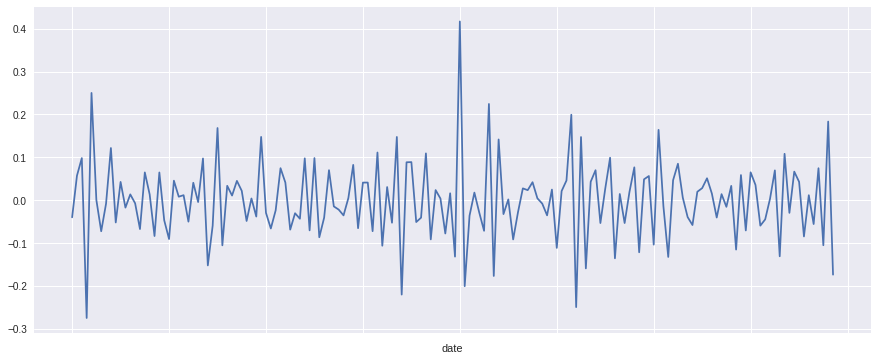

In [98]:
sdiff_unemp_train_boxcox_once_onceagain = (sdiff_unemp_train_boxcox_onceagain  - sdiff_unemp_train_boxcox_onceagain .shift(1))[1:]
sdiff_unemp_train_boxcox_once_onceagain.plot(figsize=(15,6))

In [99]:
# Test, if this is stationary, with help if kpss kriteria

kpss_stat= stattools.kpss(np.array(sdiff_unemp_train_boxcox_once_onceagain))
print('The KPSS test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ntable distribution: %s' % 
      (kpss_stat[0], kpss_stat[1], kpss_stat[2], kpss_stat[3]))

# add DF

The KPSS test statistic 0.087288, 
pvalue: 0.10 
maximal Lag: 14 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [100]:
# Augmented Dickey-Fuller unit root test
df_stat = stattools.adfuller(np.array(sdiff_unemp_train_boxcox_once_onceagain))
print('The Augmented Dickey-Fuller test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ncritical values: %s' % 
      (df_stat[0], df_stat[1], df_stat[2], df_stat[4]))

The Augmented Dickey-Fuller test statistic -4.602464, 
pvalue: 0.00 
maximal Lag: 12 
critical values: {'1%': -3.476273058920005, '5%': -2.881687616548444, '10%': -2.5775132580261593}


.........................................................Третий раз избыточен, двух достаточно



In [0]:
unemp_ready = sdiff_unemp_train_boxcox_onceagain

In [102]:
unemp_ready.iloc[1]

-0.0834346462170874

In [0]:
# Норм фича для выделения трендов, сезонности и т.д.
# result = seasonal_decompose(sdiff_unemp_train_boxcox_onceagain.iloc[:], model='multiplicative')

* 4) plot ACF/PACF for  the transformed train TS in order to understand whether $AR(p)/MA(q)$ may be used.

In [0]:
import statsmodels.api as sm
from statsmodels.tsa import stattools
import matplotlib.pyplot as plt

In [0]:
# unemp_tr_data = unemp_train[unemp_train.columns[0]].dropna()

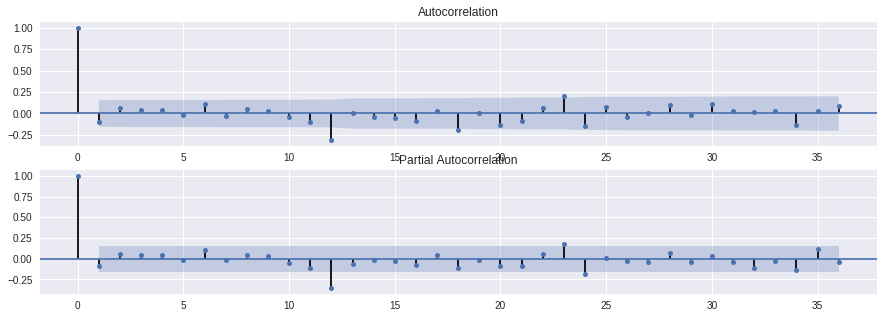

In [106]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(unemp_ready.values.squeeze(), lags=36, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(unemp_ready.values.squeeze(), lags=36, ax=ax2)


Some theoretical rules:
The data may follow an ARIMA(p,d,0) model if the ACF and PACF plots of the differenced data show the following patterns:

    the ACF is exponentially decaying or sinusoidal;
    there is a significant spike at lag p

in the PACF, but none beyond lag p.

The data may follow an ARIMA(0,d,q) model if the ACF and PACF plots of the differenced data show the following patterns:

    the PACF is exponentially decaying or sinusoidal;
    there is a significant spike at lag q

in the ACF, but none beyond lag q.




In [107]:
# Что в Partitial, что в обычной автокореляции вылазят лаги в 1+12x и 6+12х, и немноооого 2+12x.
# Попробовал (6,2) (2,6), (6,1) (1,6). Инф. крит лучше при (6,_), причем _ ==1 или_ = 2 различий мало.
# чтобы не переусложнять взял (6,1).   (6,6) хуже чем остальные
arma_mod61 = sm.tsa.ARMA(unemp_ready, (6,1)).fit() 
print(arma_mod61.params)
print(arma_mod61.aic, arma_mod61.bic, arma_mod61.hqic)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


const                -0.000918
ar.L1.unemp_boxcox   -0.337936
ar.L2.unemp_boxcox    0.033611
ar.L3.unemp_boxcox    0.061550
ar.L4.unemp_boxcox    0.054377
ar.L5.unemp_boxcox    0.001628
ar.L6.unemp_boxcox    0.109633
ma.L1.unemp_boxcox    0.249090
dtype: float64
-414.2411840208197 -386.6210462008376 -403.0249401307672


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


* 5) select set of candidate parameters for ARMA (for the train TS) <br />
Предыдущий шаг

* 6) train candidate ARIMA models (use $d$ from step 3), $p$, $q$ from step 5)), compare their AIC, choose the best model.

In [108]:
# Put your code here
# беру ряд после трансформации BC и сезонного диф-ия
arima_mod611 = sm.tsa.ARIMA(sdiff_unemp_train_boxcox, (6,1,1)).fit()
                                                           
print(arima_mod611.params)
print(arima_mod611.aic, arima_mod611.bic, arima_mod611.hqic)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


const                  -0.000918
ar.L1.D.unemp_boxcox   -0.337936
ar.L2.D.unemp_boxcox    0.033611
ar.L3.D.unemp_boxcox    0.061550
ar.L4.D.unemp_boxcox    0.054377
ar.L5.D.unemp_boxcox    0.001628
ar.L6.D.unemp_boxcox    0.109633
ma.L1.D.unemp_boxcox    0.249090
dtype: float64
-414.2411840208197 -386.6210462008376 -403.0249401307672


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [109]:
train_l = list(train_labels[-11:])
test_l = list(test_labels[:])
x = train_l + test_l
test_l[0]

'1972-05'

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


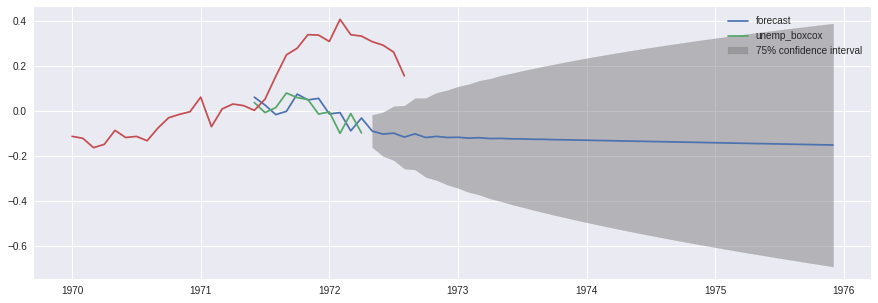

In [110]:

fig, ax = plt.subplots(figsize=(15,5),  linewidth=3.0)
fig = arima_mod611.plot_predict(start='1971-06', end='1975-12', ax=ax, alpha = 0.25)

predict = arima_mod611.predict(start='1972-05', end='1975-12')

plt.plot(test_l[12:], sdiff_unemp_test_boxcox)
plt.show()

# вообщем я не знаю, как сместить тестовую выборку вперед. Но если сместить её глазами, 
# то видно, что она попадает в 75% интрервал  уверенности

* 7) check test for unbiasedness, stationarity and non-autocorrelation of the residuals of the best ARIMA model; if the tests fail you need to review your choice.

In [111]:
# Kwiatkowski–Phillips–Schmidt–Shin
kpss_stat= stattools.kpss(arima_mod611.resid.values)
print('The KPSS test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ntable distribution: %s' % 
      (kpss_stat[0], kpss_stat[1], kpss_stat[2], kpss_stat[3]))

# стационарен

The KPSS test statistic 0.053589, 
pvalue: 0.10 
maximal Lag: 14 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [112]:
sm.stats.durbin_watson(arima_mod611.resid.values)  # ~=2 => unbias

1.9914718738925032

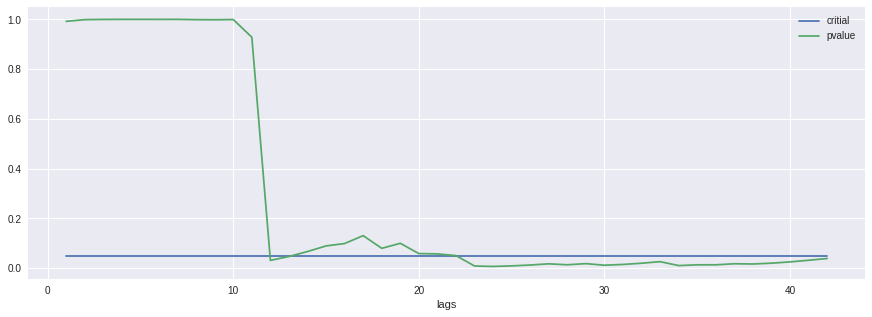

In [113]:
# Ljung-Box test (Autocorrelation)
pd.DataFrame({'lags':range(1,43,1), 'pvalue':sm.stats.diagnostic.acorr_ljungbox(arima_mod611.resid.values, lags=42)[1], 
              'critial':np.array([0.05]*42)}).set_index('lags').plot(figsize=(15,5))


* 8) build forecast for the initial TS (you need to transform it like in step 2)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


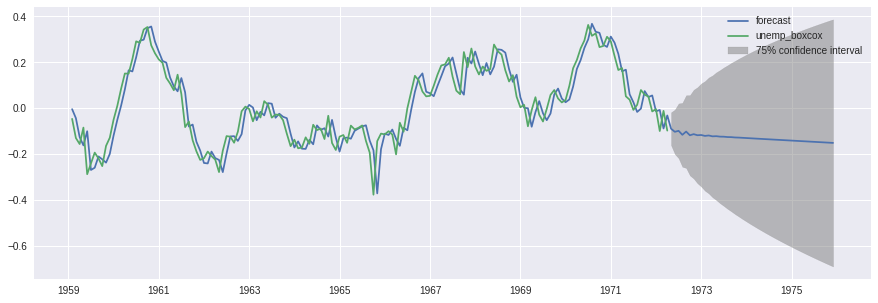

In [120]:

unemp_boxcox = deepcopy(unemp)
unemp_boxcox['unemp_boxcox'] = np.log(unemp['value'])
sdiff_unemp_boxcox = (unemp_boxcox['unemp_boxcox'] - unemp_boxcox['unemp_boxcox'].shift(p))[p:]
# 
fig, ax = plt.subplots(figsize=(15,5),  linewidth=3.0)

fig = arima_mod611.plot_predict(start='1959-02', end='1975-12', ax=ax, alpha = 0.25)


* 9) build forecast interval for the last 20% of the transformed initial TS.(сделанно выше) Calculate loss MACAPE of your forecast. Does the forecast look appropriate?

In [119]:
def qualityMACAPE(x,y):
    # Mean average corrected absolute percentage error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    qlt = (2*(x-y).abs()/(x+y)).replace([np.inf, -np.inf], np.nan)
    return qlt.mean() , (x-y).abs()

qualityMACAPE(sdiff_unemp_test_boxcox, predict[12:])[0]

0.5352531796710308

Выглядит просто идеально

<h1 align="center">Практическая часть II (50%)</h1> 
Мы будем решать достаточно классическую задачу классификации движений на основе [данных](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) из репозитория UCI ([прямая ссылка на скачивание](https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip)). Данные представляют собой сигналы с гироскопа и акселерометра, закрепленного на теле человека. Каждому семплу соотвествует 9 связанных временных рядов.

В начале приведена визуализация данных на основе PCA над вручную сгенерированными признаками. Для отрисовки графиков (цвет и легенда) нам также понадобятся метки классов.

In [1]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip"

--2018-10-12 18:01:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60999314 (58M) [application/zip]
Saving to: ‘UCI HAR Dataset.zip’

UCI HAR Dataset.zip 100%[===================>]  58.17M  5.65MB/s    in 12s     

2018-10-12 18:01:23 (4.82 MB/s) - ‘UCI HAR Dataset.zip’ saved [60999314/60999314]



In [2]:
!ls

 sample_data  'UCI HAR Dataset.zip'


In [3]:
!unzip UCI\ HAR\ Dataset.zip 

Archive:  UCI HAR Dataset.zip
   creating: UCI HAR Dataset/
  inflating: UCI HAR Dataset/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/UCI HAR Dataset/
  inflating: __MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: UCI HAR Dataset/activity_labels.txt  
  inflating: __MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: UCI HAR Dataset/features.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features.txt  
  inflating: UCI HAR Dataset/features_info.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features_info.txt  
  inflating: UCI HAR Dataset/README.txt  
  inflating: __MACOSX/UCI HAR Dataset/._README.txt  
   creating: UCI HAR Dataset/test/
   creating: UCI HAR Dataset/test/Inertial Signals/
  inflating: UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt  
   creating: __MACOSX/UCI HAR Dataset/test/
   creating: __MACOSX/UCI HAR Dataset/test/Inertial Signals/
  inflating: __MACOSX/UCI HAR Dataset/test/Inertial Signals/._body_acc_x_test.txt  
  inflating: UCI HAR

In [4]:
!ls UCI\ HAR\ Dataset/train

'Inertial Signals'   subject_train.txt	 X_train.txt   y_train.txt


In [0]:
import os

In [0]:
# !cd UCI\ HAR\ Dataset/train
# ! ls
import numpy as np
X_train_with_engineered_features = np.genfromtxt(os.path.join("UCI HAR Dataset", "train", "X_train.txt"))
y_train = np.genfromtxt(os.path.join("UCI HAR Dataset", "train", "y_train.txt"))

In [0]:
y_train_list = list(y_train)
X_unique = np.array([X_train_with_engineered_features[y_train_list.index(l)]
                             for l in sorted(list(set(y_train)))])

In [0]:
legend_labels = ["WALKING", "WALKING.UP", "WALKING.DOWN", "SITTING", "STANDING", "LAYING"]
colors_list = ['red', 'blue', 'green', 'orange', 'cyan', 'magenta']
mapped_colors = [colors_list[int(i)-1] for i in y_train]

In [0]:
from sklearn.decomposition import PCA
pca = PCA()

In [0]:
X_train_pca = pca.fit_transform(X_train_with_engineered_features)

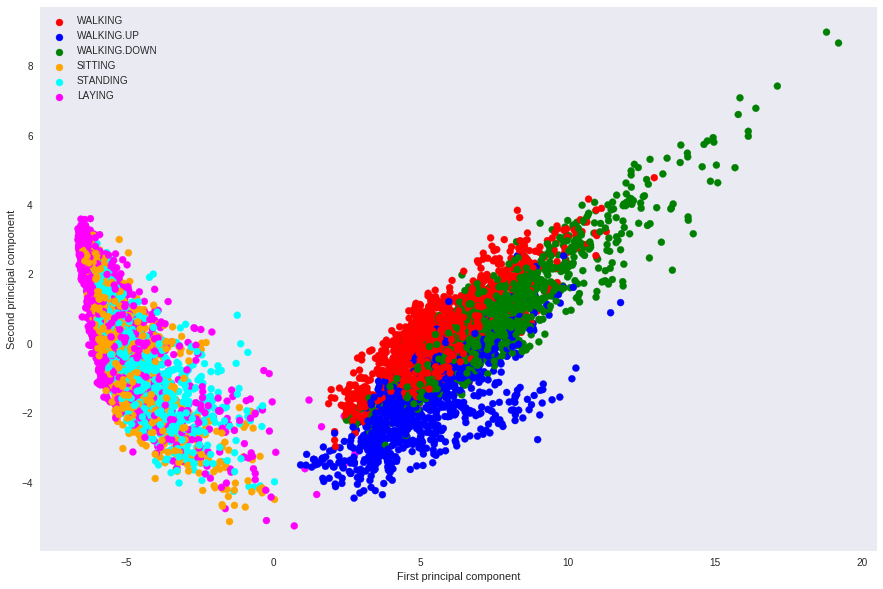

In [12]:
import pylab
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
pylab.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
             c=mapped_colors)
plt.grid()
for idx, x in enumerate(pca.transform(X_unique)):
    plt.scatter(x[0], 
                x[1], 
                c=colors_list[idx], 
                label=legend_labels[idx])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.legend()

### Часть 0. Разогрев. 
Данное задание составлено на основе данного [поста](https://burakhimmetoglu.com/2017/08/22/time-series-classification-with-tensorflow/). С помощью вручную сгенерированных фичей и классических подходов задача распознования движений была решена с точностью 96%. 

Также будет полезным изучить [вот этот](https://github.com/healthDataScience/deep-learning-HAR), а так же [вот этот репозиторий](https://github.com/guillaume-chevalier/LSTM-Human-Activity-Recognition), где к данной задаче рассматривается несколько подходов.

### Часть 1. Предобработка данных.
Предобработка сделана за нас автором [данного репозитория](https://github.com/guillaume-chevalier/LSTM-Human-Activity-Recognition).

In [0]:
import os

In [16]:
os.path.join('data', 'etc', 'file1.asdas')

'data/etc/file1.asdas'

In [17]:
# Useful Constants

# Those are separate normalised input features for the neural network
INPUT_SIGNAL_TYPES = [
    "body_acc_x_",
    "body_acc_y_",
    "body_acc_z_",
    "body_gyro_x_",
    "body_gyro_y_",
    "body_gyro_z_",
    "total_acc_x_",
    "total_acc_y_",
    "total_acc_z_"
]

# Output classes to learn how to classify
LABELS = [
    "WALKING", 
    "WALKING_UPSTAIRS", 
    "WALKING_DOWNSTAIRS", 
    "SITTING", 
    "STANDING", 
    "LAYING"
]

DATA_PATH = "./"

DATASET_PATH = DATA_PATH + "UCI HAR Dataset/"
print("\n" + "Dataset is now located at: " + DATASET_PATH)

TRAIN = "train/"
TEST = "test/"


# Load "X" (the neural network's training and testing inputs)

def load_X(X_signals_paths):
    X_signals = []
    
    for signal_type_path in X_signals_paths:
        file = open(signal_type_path, 'r')
        # Read dataset from disk, dealing with text files' syntax
        X_signals.append(
            [np.array(serie, dtype=np.float32) for serie in [
                row.replace('  ', ' ').strip().split(' ') for row in file
            ]]
        )
        file.close()
    
    return np.transpose(np.array(X_signals), (1, 2, 0))

X_train_signals_paths = [
    os.path.join(*[DATASET_PATH, TRAIN, "Inertial Signals/", signal+"train.txt"]) for signal in INPUT_SIGNAL_TYPES
]
X_test_signals_paths = [
    os.path.join(*[DATASET_PATH, TEST, "Inertial Signals/", signal+"test.txt"]) for signal in INPUT_SIGNAL_TYPES
]

X_train = load_X(X_train_signals_paths)
X_test = load_X(X_test_signals_paths)


# Load "y" (the neural network's training and testing outputs)

def load_y(y_path):
    file = open(y_path, 'r')
    # Read dataset from disk, dealing with text file's syntax
    y_ = np.array(
        [elem for elem in [
            row.replace('  ', ' ').strip().split(' ') for row in file
        ]], 
        dtype=np.int32
    )
    file.close()
    
    # Substract 1 to each output class for friendly 0-based indexing 
    return y_ - 1

y_train_path = os.path.join(DATASET_PATH, TRAIN, "y_train.txt")
y_test_path = os.path.join(DATASET_PATH, TEST, "y_test.txt")

y_train = load_y(y_train_path)
y_test = load_y(y_test_path)


Dataset is now located at: ./UCI HAR Dataset/


In [19]:
# Input Data 

training_data_count = len(X_train)  # 7352 training series (with 50% overlap between each serie)
test_data_count = len(X_test)  # 2947 testing series
n_steps = len(X_train[0])  # 128 timesteps per series
n_input = len(X_train[0][0])  # 9 input parameters per timestep


# LSTM Neural Network's internal structure

n_hidden = 32 # Hidden layer num of features
n_classes = 6 # Total classes (should go up, or should go down)


# Some debugging info

print("Some useful info to get an insight on dataset's shape and normalisation:")
print("(X shape, y shape, every X's mean, every X's standard deviation)")
print(X_test.shape, y_test.shape, np.mean(X_test), np.std(X_test))
print("The dataset is therefore properly normalised, as expected, but not yet one-hot encoded.")

Some useful info to get an insight on dataset's shape and normalisation:
(X shape, y shape, every X's mean, every X's standard deviation)
(2947, 128, 9) (2947, 1) 0.09913992 0.39567086
The dataset is therefore properly normalised, as expected, but not yet one-hot encoded.


### Часть 2. Построение сети и эксперименты. (50% +)
Ваша задача - построить сеть, которая решит задачу классификации с точностью (`accuracy`) не менее 80%. Это может оказаться нетривиальной задачей, поэтому трезво оценивайте свои силы. 

__Warning!__ В сети существует несколько решений данной задачи с использованием различных фреймворков. При проверке это будет учитываться, так что свое решение нужно будет объяснить. Пожалуйста, не копируйте бездумно код, такие задания будут оценены 0 баллов.

После выполнения задания заполните небольшой отчет об экспериментах вида "Я пробовал(а) ... подходы и получил(а) ... результаты. Наконец, после N+1 чашки кофе/бессонной ночи задача была решена благодаря ..."  <br/>

СМ конец файла

Базовая модель построена с использованием библиотеки `keras` для вас. Вы можете использовать любой знакомый вам фреймворк. Удачи в экспериментах. 

__Bonus__: при достижении 85% accuracy - 25% бонусных баллов, при достижении 89% accuracy - 50% бонусных баллов (т.е. ещё 25%).

In [20]:
import keras

Using TensorFlow backend.


Метки классов стоит перевести в one-hot-encoded формат (теперь это векторы вероятностей принадлежности классу). 

In [0]:
### Your code and experiments here


from keras.models import Sequential
from keras.layers import Dense, Conv1D, Activation, MaxPooling1D, Flatten, BatchNormalization
from keras.layers import LSTM, Dropout, SimpleRNN, Embedding, Reshape
from keras.utils import to_categorical
from keras.initializers import RandomNormal
from keras import regularizers
from sklearn.metrics import accuracy_score

In [0]:
# модель из статьи

#Create model

# # (batch, 128, 9) --> (batch, 64, 18)
#     conv1 = tf.layers.conv1d(inputs=inputs_, filters=18, kernel_size=2, strides=1, 
#                              padding='same', activation = tf.nn.relu)
#     max_pool_1 = tf.layers.max_pooling1d(inputs=conv1, pool_size=2, strides=2, padding='same')
    
#     # (batch, 64, 18) --> (batch, 32, 36)
#     conv2 = tf.layers.conv1d(inputs=max_pool_1, filters=36, kernel_size=2, strides=1, 
#                              padding='same', activation = tf.nn.relu)
#     max_pool_2 = tf.layers.max_pooling1d(inputs=conv2, pool_size=2, strides=2, padding='same')
    
#     # (batch, 32, 36) --> (batch, 16, 72)
#     conv3 = tf.layers.conv1d(inputs=max_pool_2, filters=72, kernel_size=2, strides=1, 
#                              padding='same', activation = tf.nn.relu)
#     max_pool_3 = tf.layers.max_pooling1d(inputs=conv3, pool_size=2, strides=2, padding='same')
    
#     # (batch, 16, 72) --> (batch, 8, 144)
#     conv4 = tf.layers.conv1d(inputs=max_pool_3, filters=144, kernel_size=2, strides=1, 
#                              padding='same', activation = tf.nn.relu)
#     max_pool_4 = tf.layers.max_pooling1d(inputs=conv4, pool_size=2, strides=2, padding='same')

# flat = tf.reshape(max_pool_4, (-1, 8*144))
#     flat = tf.nn.dropout(flat, keep_prob=keep_prob_)
    
#     # Predictions
#     logits = tf.layers.dense(flat, n_classes)
    
#     # Cost function and optimizer
#     cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels_))
#     optimizer = tf.train.AdamOptimizer(learning_rate_).minimize(cost)
    
#     # Accuracy
#     correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(labels_, 1))
#     accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

In [210]:
baseNetwork = Sequential()

baseNetwork.add(Conv1D(18, 2, strides=1, padding='valid', activation='relu', input_shape=(128,9), 
                       batch_input_shape=(128,128,9), kernel_initializer=RandomNormal(mean=0.0, stddev=0.02), bias_initializer=RandomNormal(mean=0.0, stddev=0.02)))
baseNetwork.add(MaxPooling1D(pool_size=2, strides=2))
baseNetwork.add(Conv1D(36, 2, strides=1, padding='valid', activation='relu', kernel_initializer=RandomNormal(
    mean=0.0, stddev=0.02), bias_initializer=RandomNormal(mean=0.0, stddev=0.02)))
baseNetwork.add(BatchNormalization())
baseNetwork.add(MaxPooling1D(pool_size=3, strides=3))
baseNetwork.add(Conv1D(72, 2, strides=1, padding='valid', activation='relu', kernel_initializer=RandomNormal(
    mean=0.0, stddev=0.02), bias_initializer=RandomNormal(mean=0.0, stddev=0.02)))
baseNetwork.add(MaxPooling1D(pool_size=2, strides=2))
# baseNetwork.add(Conv1D(144, 2, strides=1, padding='valid', activation='relu', kernel_initializer=RandomNormal(
#     mean=0.0, stddev=0.02), bias_initializer=RandomNormal(mean=0.0, stddev=0.02)))

# baseNetwork.add(MaxPooling1D(pool_size=2, strides=2))
# baseNetwork.add(Flatten())


# baseNetwork.add(Dense (512, activation='elu'))
# model.add(BatchNormalization())
# baseNetwork.summary()
baseNetwork.add(Dense (512, activation='elu'))
# model.add(BatchNormalization())

# baseNetwork.summary()
baseNetwork.summary()
baseNetwork.add(Reshape((9,512)))
baseNetwork.add(BatchNormalization())
baseNetwork.add(LSTM(256, stateful=True, return_sequences=False))
# baseNetwork.add(Dropout(0.3))

baseNetwork.add(Dropout(0.5))
baseNetwork.add(Dense(6, activation='relu'))
baseNetwork.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (128, 127, 18)            342       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (128, 63, 18)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (128, 62, 36)             1332      
_________________________________________________________________
batch_normalization_1 (Batch (128, 62, 36)             144       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (128, 20, 36)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (128, 19, 72)             5256      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (128, 9, 72)              0         
__________

In [0]:
# keras.backend.clear_session()

In [197]:
baseNetwork.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (128, 127, 18)            342       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (128, 63, 18)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (128, 62, 36)             1332      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (128, 20, 36)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (128, 19, 72)             5256      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (128, 9, 72)              0         
_________________________________________________________________
dense_1 (Dense)              (128, 9, 512)             37376     
__________

In [0]:
def one_hot_encode(y, n_classes):
    return keras.utils.to_categorical(y, num_classes=n_classes)

In [0]:
y_train_one_hot = one_hot_encode(y_train, 6)
y_test_one_hot = one_hot_encode(y_test, 6)

In [211]:
baseNetwork.fit(X_train[:7296], y_train_one_hot[:7296], batch_size=128, epochs=55, verbose=0)

In [212]:
accuracy_score(y_test[:2944], baseNetwork.predict_classes(X_test[:2944], batch_size=128))
# hec, it works

0.8943614130434783

Взял архитектуру сети из второй статьи (CNN). На 50 итерациях точность достигла 66%. Добавил LSTM, убрал 2 сверточный слоя-- 86%. Добавил нормализацию- 89+.

Как видно, я ограничивал train/test выборку(при тесте accuracy_score оказались выкинуты 3 экземпляра. Это ~0.001 от всей тестовой выборки, даже если они классифицируются не правильно, то точность останется выше 89%). Это пришлось сделать потому, что в сети stateful-LSTM. Зачем? <br />
Если верить stackoverflow, то состояние lstm "сбрасывается" до предыдущего, при обучении на батчах даты. у stable-lstm оно сохраняется. Решил посмотреть, к чему это приведет.

In [215]:
baseNetwork.fit(X_train[:7296], y_train_one_hot[:7296], batch_size=128, epochs=5, verbose=0)

In [216]:
accuracy_score(y_test[:2944], baseNetwork.predict_classes(X_test[:2944], batch_size=128))
# ещё +5 эпох-- точность 90+%
# ешё +5 эпох-- точность 87+% на этом остановился

0.876358695652174